In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
product_data_id = 'MLM1000_1000'
similarity_type_1 = 'semantic'
similarity_type_2 = 'thumbnail'

df_1 = pd.read_csv(f'./data_warehouse/{similarity_type_1}_similarity/{similarity_type_1}_similarity_{product_data_id}.csv')
df_2 = pd.read_csv(f'./data_warehouse/{similarity_type_2}_similarity/{similarity_type_2}_similarity_{product_data_id}.csv')

df_1.rename(columns={'similarity_score' : f'similarity_score_{similarity_type_1}'},inplace=True)
df_2.rename(columns={'similarity_score' : f'similarity_score_{similarity_type_2}'},inplace=True)

shared_columns = ['domain_id','catalog_product_id_x','catalog_product_id_y','semantic_string_x','semantic_string_y','brand_x','brand_y']
df = pd.merge(df_1,df_2,how='inner',on=shared_columns)

different_product_index = df['catalog_product_id_x']!=df['catalog_product_id_y']
different_brand_index = df['brand_x']!=df['brand_y']
df = df[different_product_index & different_brand_index]

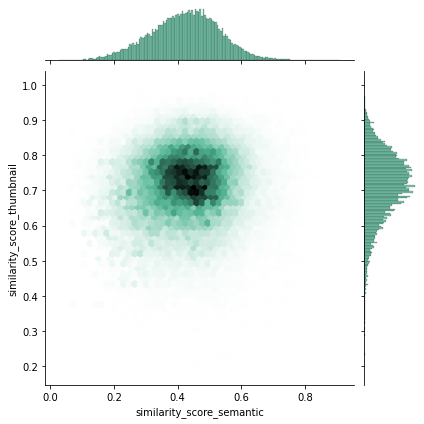

In [3]:
sns.jointplot(x=f'similarity_score_{similarity_type_1}', 
              y=f'similarity_score_{similarity_type_2}', 
              data=df, kind="hex", color="#4CB391")
plt.show()

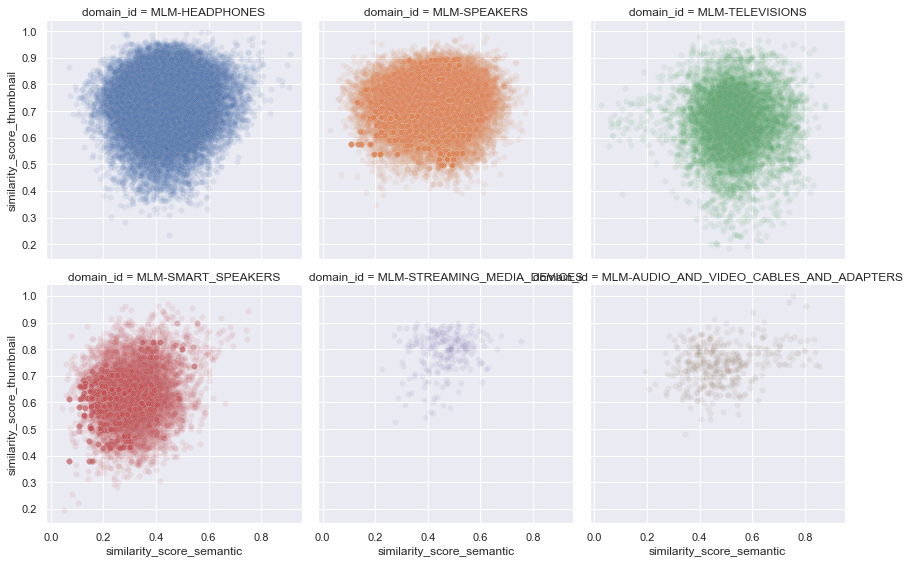

In [9]:
top_domains = df['domain_id'].value_counts().head(6)
df_a = df[df['domain_id'].isin(top_domains.index)]

# Plotting distributions
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_a, col="domain_id", hue="domain_id", col_wrap=3, height=4, palette='deep')
g.map(sns.scatterplot, "similarity_score_semantic", "similarity_score_thumbnail",alpha=0.05)

plt.show()